# Case Studies
## 1 Function Definitions
* If given `x`, the functions will try to calculate the actual results.
* If not given `x`, the function will return the function in symbolic style.

In [99]:
from typing import List
import numpy as np
import sympy as sp
from sympy import Sum
from sympy.functions import log, exp
import copy


def ellipsoid(x: List[float] = None, alpha: int = 1000) -> float:
    if x is not None:
        d = len(x)
        return sum([alpha ** ((i - 1) / (d - 1)) * x[i - 1] ** 2 for i in range(1, d + 1)])
    else:
        i, d, alpha = sp.symbols('i d alpha')
        x = sp.IndexedBase('x')
        return Sum(alpha ** ((i - 1) / (d - 1)) * x[i] ** 2, (i, 1, d))


def rosenbrock_banana(x_1: float = None, x_2: float = None) -> float:
    if x_1 != None and x_2 != None:
        return (1 - x_1) ** 2 + 100 * (x_2 - x_1 ** 2) ** 2
    else:
        x_1, x_2 = sp.symbols('x_1 x_2')
        return (1 - x_1) ** 2 + 100 * (x_2 - x_1 ** 2) ** 2


def log_ellipsoid(x: List[float] = None, epsilon: float = 1e-4) -> float:
    if x is not None:
        return np.log(epsilon + ellipsoid(x))
    else:
        epsilon = sp.symbols('epsilon')
        return log(epsilon + ellipsoid())


def attractive_sector(x: List[float] = None, q: float = 1e4) -> float:
    try:
        if x is not None:
            d = len(x)
            # h = lambda x : np.log(1 + np.exp(q * x)) / q
            h = lambda x: (np.log(1 + np.exp(-abs(q * x))) + max(q * x, 0)) / q
            return sum([np.power(h(x[i - 1]), 2) + 100 * np.power(h(-x[i - 1]), 2) for i in range(1, d + 1)])
        else:
            i, d, q = sp.symbols('i d q')
            h1, h2 = sp.symbols('h1 h2')
            x = sp.IndexedBase('x')
            return Sum(h1 ** 2 + 100 * h2 ** 2, (i, 1, d)).subs(
                {h1: log(1 + exp(q * x[i])) / q, h2: log(1 + exp(q * - x[i])) / q})
    except:
        print("An error happened. The temporary x is {}.".format(x))


def sum_of_different_powers(x: List[float] = None) -> float:
    if x is not None:
        d = len(x)
        return sum([np.power(np.power(x[i - 1], 2), 1 + (i - 1) / (d - 1)) for i in range(1, d + 1)])
    else:
        i, d = sp.symbols('i d')
        x = sp.IndexedBase('x')
        return Sum((x[i] ** 2) ** (1 + (i - 1) / (d - 1)), (i, 1, d))

## 2 Gradient
First Derivate
### 2.1 Definitons
* The reason that there is a `_` before parameters is because we need to distinguish between input parameters and symbols.
* If given `_x`, the functions will try to do first derivate in symbolic manner, and substitute the symbols with actual values after that.
* If not given `_x` but given `_d`, the functions will give the results of gradient in symbolic style.

In [100]:
def ellipsoid_first_derivate(_x: List[float] = None, _d: int = None, _alpha: int = 1000) -> float:
    i, d, alpha = sp.symbols('i d alpha')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [ellipsoid().subs({d: _d, alpha: _alpha}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(1, _d + 1):
            gradient[i - 1] = ellipsoid().subs({d: _d, alpha: _alpha}).doit().diff(x[i]).subs(
                [(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient


def rosenbrock_banana_first_derivate(_x_1: float = None, _x_2: float = None) -> float:
    x_1, x_2 = sp.symbols('x_1 x_2')
    gradient = [rosenbrock_banana().diff(x_1), rosenbrock_banana().diff(x_2)]
    if not (_x_1 and _x_2):
        return gradient
    else:
        return [g.subs({x_1: _x_1, x_2: _x_2}) for g in gradient]


def log_ellipsoid_first_derivate(_x: List[float] = None, _d: int = None, _epsilon: float = 1e-4) -> float:
    d, epsilon = sp.symbols('d epsilon')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [log_ellipsoid().subs({d: _d, epsilon: _epsilon}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(1, _d + 1):
            gradient[i - 1] = log_ellipsoid().subs({d: _d, epsilon: _epsilon}).doit().diff(x[i]).subs(
                [(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient


def attractive_sector_first_derivate(_x: List[float] = None, _d: int = None, _q: float = 1e4) -> float:
    i, d, q = sp.symbols('i d q')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [attractive_sector().subs({d: _d, q: _q}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(1, _d + 1):
            gradient[i - 1] = attractive_sector().subs({d: _d, q: _q}).doit().diff(x[i]).subs(
                [(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient


def sum_of_different_powers_first_derivate(_x: List[float] = None, _d: int = None) -> float:
    i, d = sp.symbols('i d')
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [sum_of_different_powers().subs({d: _d}).doit().diff(x[i]) for i in range(1, _d + 1)]
    else:
        _d = len(_x)
        gradient = [0] * _d
        for i in range(1, _d + 1):
            gradient[i - 1] = sum_of_different_powers().subs({d: _d}).doit().diff(x[i]).subs(
                [(x[i], _x[i - 1]) for i in range(1, _d + 1)])
        return gradient

### 2.2 Demo

In [101]:
x_input = [1, 2, 3]
d_input = 3

In [102]:
ellipsoid()

Sum(alpha**((i - 1)/(d - 1))*x[i]**2, (i, 1, d))

In [103]:
print(ellipsoid(x=x_input))
print(ellipsoid_first_derivate(_d=d_input))
print(ellipsoid_first_derivate(_x=x_input))

9127.491106406735
[2*x[1], 20*sqrt(10)*x[2], 2000*x[3]]
[2, 40*sqrt(10), 6000]


In [104]:
rosenbrock_banana()

(1 - x_1)**2 + 100*(-x_1**2 + x_2)**2

In [105]:
print(rosenbrock_banana(x_1=1, x_2=1))
print(rosenbrock_banana_first_derivate())
print(rosenbrock_banana_first_derivate(1, 1))

0
[-400*x_1*(-x_1**2 + x_2) + 2*x_1 - 2, -200*x_1**2 + 200*x_2]
[0, 0]


In [106]:
log_ellipsoid()

log(epsilon + Sum(alpha**((i - 1)/(d - 1))*x[i]**2, (i, 1, d)))

In [107]:
from math import sqrt

print(log_ellipsoid(x=x_input))
print(log_ellipsoid_first_derivate(_d=d_input))
print(log_ellipsoid_first_derivate(_x=x_input))

9.119046150111824
[2*x[1]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001), 2*sqrt(alpha)*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001), 2*alpha*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)]
[2/(4*sqrt(alpha) + 9*alpha + 1.0001), 4*sqrt(alpha)/(4*sqrt(alpha) + 9*alpha + 1.0001), 6*alpha/(4*sqrt(alpha) + 9*alpha + 1.0001)]


In [108]:
attractive_sector()

Sum(100*log(1 + exp(-q*x[i]))**2/q**2 + log(exp(q*x[i]) + 1)**2/q**2, (i, 1, d))

In [109]:
print(attractive_sector(x=x_input))
print(attractive_sector_first_derivate(_d=d_input))
print(attractive_sector_first_derivate(_x=x_input))

14.0
[0.0002*exp(10000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1) - 0.02*exp(-10000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1])), 0.0002*exp(10000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1) - 0.02*exp(-10000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2])), 0.0002*exp(10000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000.0*x[3]) + 1) - 0.02*exp(-10000.0*x[3])*log(1 + exp(-10000.0*x[3]))/(1 + exp(-10000.0*x[3]))]
[2.00000000000000, 4.00000000000000, 6.00000000000000]


In [110]:
sum_of_different_powers()

Sum((x[i]**2)**(1 + (i - 1)/(d - 1)), (i, 1, d))

In [111]:
print(sum_of_different_powers(x=x_input))
print(sum_of_different_powers_first_derivate(_d=d_input))
print(sum_of_different_powers_first_derivate(_x=x_input))

90.0
[2*x[1], 3*(x[2]**2)**(3/2)/x[2], 4*x[3]**3]
[2, 12, 108]


## 3 Hessian

* `fpd` stands for `first partial derivate`.

In [112]:
def ellipsoid_second_derivate(_x: List[float] = None, _d: int = None, _alpha: int = 1000) -> float:
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in
                    ellipsoid_first_derivate(_d=_d, _alpha=_alpha)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd
                in ellipsoid_first_derivate(_d=_d, _alpha=_alpha)]


def rosenbrock_banana_second_derivate(_x_1: float = None, _x_2: float = None) -> float:
    x_1, x_2 = sp.symbols('x_1 x_2')
    if not (_x_1 and _x_2):
        return [[fpd.diff(x_1), fpd.diff(x_2)] for fpd in rosenbrock_banana_first_derivate()]
    else:
        return [[fpd.diff(x_1).subs({x_1: _x_1, x_2: _x_2}), fpd.diff(x_2).subs({x_1: _x_1, x_2: _x_2})] for fpd in
                rosenbrock_banana_first_derivate()]


def log_ellipsoid_second_derivate(_x: List[float] = None, _d: int = None, _epsilon: float = 1e-4) -> float:
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in
                    log_ellipsoid_first_derivate(_d=_d, _epsilon=_epsilon)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd
                in log_ellipsoid_first_derivate(_d=_d, _epsilon=_epsilon)]


def attractive_sector_second_derivate(_x: List[float] = None, _d: int = None, _q: float = 1e4) -> float:
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in
                    attractive_sector_first_derivate(_d=_d, _q=_q)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd
                in attractive_sector_first_derivate(_d=_d, _q=_q)]


def sum_of_different_powers_second_derivate(_x: List[float] = None, _d: int = None) -> float:
    x = sp.IndexedBase('x')
    if _x is None:
        if _d is None:
            print("Error. You need to specify the dimension of the input or give the input vector.")
            return None
        else:
            return [[fpd.diff(x[i]) for i in range(1, _d + 1)] for fpd in sum_of_different_powers_first_derivate(_d=_d)]
    else:
        _d = len(_x)
        return [[fpd.diff(x[i]).subs([(x[i], _x[i - 1]) for i in range(1, _d + 1)]) for i in range(1, _d + 1)] for fpd
                in sum_of_different_powers_first_derivate(_d=_d)]

### 3.1 Demo

In [113]:
print(ellipsoid_second_derivate(_d=d_input))
print(ellipsoid_second_derivate(_x=x_input))

[[2, 0, 0], [0, 20*sqrt(10), 0], [0, 0, 2000]]
[[2, 0, 0], [0, 20*sqrt(10), 0], [0, 0, 2000]]


In [114]:
print(rosenbrock_banana_second_derivate())
print(rosenbrock_banana_second_derivate(_x_1=1, _x_2=1))

[[1200*x_1**2 - 400*x_2 + 2, -400*x_1], [-400*x_1, 200]]
[[802, -400], [-400, 200]]


In [115]:
print(log_ellipsoid_second_derivate(_d=d_input))
print(log_ellipsoid_second_derivate(_x=x_input))

[[2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001) - 4*x[1]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*sqrt(alpha)*x[1]*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha*x[1]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2], [-4*sqrt(alpha)*x[1]*x[2]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, 2*sqrt(alpha)/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001) - 4*alpha*x[2]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**(3/2)*x[2]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2], [-4*alpha*x[1]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**(3/2)*x[2]*x[3]/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2, -4*alpha**2*x[3]**2/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)**2 + 2*alpha/(sqrt(alpha)*x[2]**2 + alpha*x[3]**2 + x[1]**2 + 0.0001)]]
[[2/(4*sqrt(alpha) + 9*alpha + 1.0001) - 0.04938271604938

In [116]:
print(attractive_sector_second_derivate(_d=d_input))
print(attractive_sector_second_derivate(_x=x_input))

[[2.0*exp(10000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1) - 2.0*exp(20000.0*x[1])*log(exp(10000.0*x[1]) + 1)/(exp(10000.0*x[1]) + 1)**2 + 2.0*exp(20000.0*x[1])/(exp(10000.0*x[1]) + 1)**2 + 200.0*exp(-10000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1])) - 200.0*exp(-20000.0*x[1])*log(1 + exp(-10000.0*x[1]))/(1 + exp(-10000.0*x[1]))**2 + 200.0*exp(-20000.0*x[1])/(1 + exp(-10000.0*x[1]))**2, 0, 0], [0, 2.0*exp(10000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1) - 2.0*exp(20000.0*x[2])*log(exp(10000.0*x[2]) + 1)/(exp(10000.0*x[2]) + 1)**2 + 2.0*exp(20000.0*x[2])/(exp(10000.0*x[2]) + 1)**2 + 200.0*exp(-10000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2])) - 200.0*exp(-20000.0*x[2])*log(1 + exp(-10000.0*x[2]))/(1 + exp(-10000.0*x[2]))**2 + 200.0*exp(-20000.0*x[2])/(1 + exp(-10000.0*x[2]))**2, 0], [0, 0, 2.0*exp(10000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000.0*x[3]) + 1) - 2.0*exp(20000.0*x[3])*log(exp(10000.0*x[3]) + 1)/(exp(10000

In [117]:
print(sum_of_different_powers_second_derivate(_d=d_input))
print(sum_of_different_powers_second_derivate(_x=x_input))

[[2, 0, 0], [0, 6*(x[2]**2)**(3/2)/x[2]**2, 0], [0, 0, 12*x[3]**2]]
[[2, 0, 0], [0, 12, 0], [0, 0, 108]]


## 4 Numeric Computation
One way to verify the results of symbolic computation based on `sympy` is to use numeric computation.

4.1 Gradient

In [118]:
epsilon = 0.001


def gradient_numerical(f, inputs, local_epsilon):
    gradients = []
    for i in range(len(inputs)):
        input_plus_epsilon = copy.copy(inputs)
        input_minus_epsilon = copy.copy(inputs)
        input_plus_epsilon[i] += local_epsilon
        input_minus_epsilon[i] -= local_epsilon
        gradient = (f(input_plus_epsilon) - f(input_minus_epsilon)) / (2 * local_epsilon)
        gradients.append(gradient)
    return gradients



In [119]:
# f1
print(ellipsoid_first_derivate(_x=x_input))
print(gradient_numerical(ellipsoid, x_input, epsilon))

[2, 40*sqrt(10), 6000]
[2.0000000004074536, 126.49110640722938, 6000.0]


In [120]:
# f2
print(rosenbrock_banana_first_derivate(1, 1))
f2_input0_minus_epsilon = rosenbrock_banana(1 - epsilon, 1)
f2_input0_plus_epsilon = rosenbrock_banana(1 + epsilon, 1)
f2_input1_minus_epsilon = rosenbrock_banana(1, 1 - epsilon)
f2_input1_plus_epsilon = rosenbrock_banana(1, 1 + epsilon)
f2_gradient0 = (f2_input0_plus_epsilon - f2_input0_minus_epsilon) / (2 * epsilon)
f2_gradient1 = (f2_input1_plus_epsilon - f2_input1_minus_epsilon) / (2 * epsilon)
f2_gradient = [f2_gradient0, f2_gradient1]
print(f2_gradient)

[0, 0]
[0.0003999999999447154, -1.1106296004398386e-14]


In [121]:
#f3
print(log_ellipsoid_first_derivate(_x=x_input))
print(gradient_numerical(log_ellipsoid, x_input, epsilon))
# alpha = 1000
# print(2/(4*sqrt(alpha) + 9*alpha + 1.0001))

[2/(4*sqrt(alpha) + 9*alpha + 1.0001), 4*sqrt(alpha)/(4*sqrt(alpha) + 9*alpha + 1.0001), 6*alpha/(4*sqrt(alpha) + 9*alpha + 1.0001)]
[0.0002191182604249775, 0.013858255583976131, 0.657354805520427]


In [122]:
#f4
print(attractive_sector_first_derivate(_x=x_input))
print(gradient_numerical(attractive_sector, x_input, epsilon))

[2.00000000000000, 4.00000000000000, 6.00000000000000]
[1.9999999999997797, 3.9999999999995595, 5.999999999999339]


In [123]:
#f5
print(sum_of_different_powers_first_derivate(_x=x_input))
print(gradient_numerical(sum_of_different_powers, x_input, epsilon))

[2, 12, 108]
[2.0000000000024443, 12.00000100000409, 108.00001199999087]


4.2 Hessian

In [124]:
def hessian_numerical(f, inputs, local_epsilon):
    hessian = []
    for i in range(len(inputs)):
        hessian_i = []
        input_plus_epsilon_i = copy.copy(inputs)
        input_plus_epsilon_i[i] += local_epsilon
        for j in range(len(inputs)):
            input_plus_epsilon_ij = copy.copy(input_plus_epsilon_i)
            input_plus_epsilon_ij[j] += local_epsilon
            input_plus_epsilon_j = copy.copy(inputs)
            input_plus_epsilon_j[j] += local_epsilon
            hessian_ij = ((f(input_plus_epsilon_ij) - f(input_plus_epsilon_i))
                          - f(input_plus_epsilon_j) + f(inputs)) / (local_epsilon * local_epsilon)
            hessian_i.append(hessian_ij)
        hessian.append(hessian_i)
    return hessian

In [125]:
#f1
print(ellipsoid_second_derivate(_x=x_input))
print(hessian_numerical(ellipsoid, x_input, epsilon))

[[2, 0, 0], [0, 20*sqrt(10), 0], [0, 0, 2000]]
[[1.9999988580821082, -1.8189894035458565e-06, 0.0], [-1.8189894035458565e-06, 63.24555215542205, 0.0], [0.0, 0.0, 1999.9999985884642]]


In [126]:
#f2

def f2_hessian_ij(input_ij, input_i, input_j, inputs, local_epsilon):
    return (rosenbrock_banana(input_ij[0], input_ij[1]) - rosenbrock_banana(input_i[0], input_i[1]) - rosenbrock_banana(
        input_j[0], input_j[1]) + rosenbrock_banana(
        inputs[0], inputs[1])) / (local_epsilon * local_epsilon)

print(rosenbrock_banana_second_derivate(_x_1=1, _x_2=1))
f2_input = (1, 1)
f2_input00_plus_epsilon = (1 + 2 * epsilon, 1)
f2_input01_plus_epsilon = (1 + epsilon, 1 + epsilon)
f2_input11_plus_epsilon = (1, 1 + 2 * epsilon)
f2_input0_plus_epsilon = (1 + epsilon, 1)
f2_input1_plus_epsilon = (1, 1 + epsilon)
hessian00 = f2_hessian_ij(f2_input00_plus_epsilon, f2_input0_plus_epsilon, f2_input0_plus_epsilon, f2_input, epsilon)
hessian01 = f2_hessian_ij(f2_input01_plus_epsilon, f2_input0_plus_epsilon, f2_input1_plus_epsilon, f2_input, epsilon)
hessian10 = f2_hessian_ij(f2_input01_plus_epsilon, f2_input1_plus_epsilon, f2_input0_plus_epsilon, f2_input, epsilon)
hessian11 = f2_hessian_ij(f2_input11_plus_epsilon, f2_input1_plus_epsilon, f2_input1_plus_epsilon, f2_input, epsilon)
f2_hessian = [[hessian00, hessian01], [hessian10, hessian11]]
print(f2_hessian)

[[802, -400], [-400, 200]]
[[804.4014000001599, -400.1999999998954], [-400.19999999989534, 200.00000000004476]]


In [127]:
#f3
print(log_ellipsoid_second_derivate(_x=x_input))
print(hessian_numerical(log_ellipsoid, x_input, epsilon))

[[2/(4*sqrt(alpha) + 9*alpha + 1.0001) - 0.0493827160493827/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, -0.0987654320987655*sqrt(alpha)/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, -0.148148148148148*alpha/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2], [-0.0987654320987655*sqrt(alpha)/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, 2*sqrt(alpha)/(4*sqrt(alpha) + 9*alpha + 1.0001) - 0.197530864197531*alpha/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, -0.296296296296296*alpha**(3/2)/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2], [-0.148148148148148*alpha/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, -0.296296296296296*alpha**(3/2)/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2, -0.444444444444445*alpha**2/(0.444444444444444*sqrt(alpha) + alpha + 0.111122222222222)**2 + 2*alpha/(4*sqrt(alpha) + 9*alpha + 1.0001)]]
[[0.0002190727599327147, -3.03757

In [128]:
#f4
print(attractive_sector_second_derivate(_x=x_input))
print(hessian_numerical(attractive_sector, x_input, epsilon))

[[2.00000000000364, 0, 0], [0, 1.99999999999272, 0], [0, 0, 1.99999999999272]]
[[1.999999998503199, 0.0, 0.0], [0.0, 2.0000000020559128, 1.7763568394002505e-09], [0.0, 1.7763568394002505e-09, 2.000000000279556]]


In [129]:
#f5
print(sum_of_different_powers_second_derivate(_x=x_input))
print(hessian_numerical(sum_of_different_powers, x_input, epsilon))

[[2, 0, 0], [0, 12, 0], [0, 0, 108]]
[[1.9999999807396307, -1.4210854715202004e-08, 0.0], [-1.4210854715202004e-08, 12.005999991515637, 0.0], [0.0, 0.0, 108.07201400098165]]


## 5 Plot

* It seems that the calculation will be much faster if we define function in `lambda` style like the `rosenbrock banana` function below. The reason is in this way we are using `numpy`'s vectorizing array operations so that looping occurs in C instead of Python. However, the other four functions involves $\sum$, which I am not sure whether we can rewrite them in the same way.

### 5.1 The Ellipsoid function

In [130]:
import matplotlib.pyplot as plt

func = {"ellipsoid": ellipsoid,
        "rosenbrock_banana": lambda x_1, x_2: (1 - x_1) ** 2 + 100 * (x_2 - x_1 ** 2) ** 2,
        "log_ellipsoid": log_ellipsoid,
        "attractive_sector": attractive_sector,
        "sum_of_different_powers": sum_of_different_powers}


def get_Z(X, Y, func_name: str):
    f = func[func_name]
    if func_name == "rosenbrock_banana":
        Z = f(X, Y)
    else:
        n = X.shape[0]
        Z = np.array([[f([X[i][j], Y[i][j]]) for j in range(n)] for i in range(n)])
    return Z


def my_plot_3d(X, Y, func_name: str):
    X, Y = np.meshgrid(X, Y)

    Z = get_Z(X, Y, func_name)

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, shrink=0.5, aspect=10)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$f_(x)$")
    ax.set_title("The {} Function".format(func_name.replace("_", " ")).title())
    fig.savefig("../images/{}_3d.png".format(func_name))


def my_plot_contour(X, Y, func_name: str):
    X, Y = np.meshgrid(X, Y)

    Z = get_Z(X, Y, func_name)

    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes()
    contour = ax.contour(X, Y, Z, 200, cmap='viridis')
    fig.colorbar(contour, aspect=10)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title("The {} Function".format(func_name.replace("_", " ")).title())
    fig.savefig("../images/{}_contour.png".format(func_name))

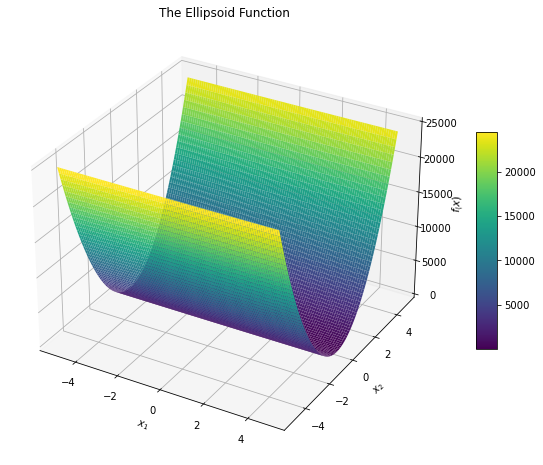

In [131]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
my_plot_3d(X, Y, "ellipsoid")

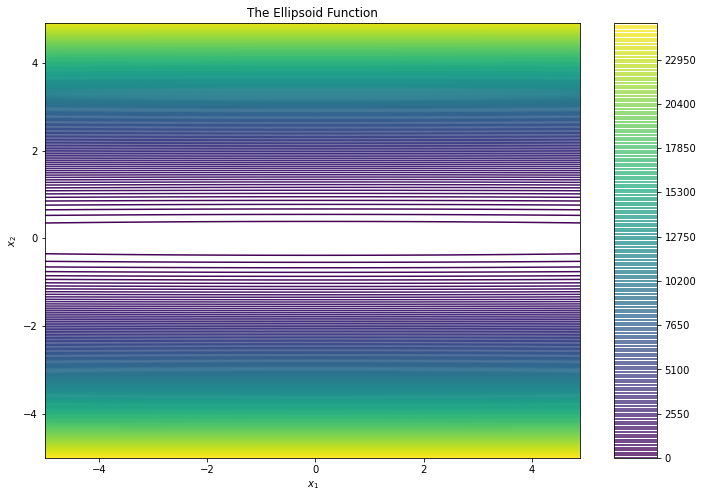

In [132]:
my_plot_contour(X, Y, "ellipsoid")

### 5.2 The Rosenbrock Banana Function

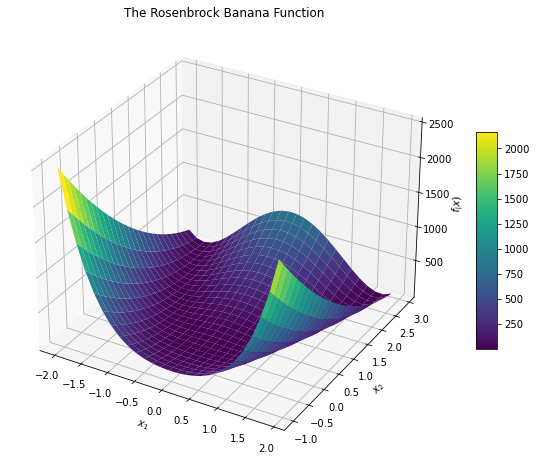

In [133]:
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
my_plot_3d(X, Y, "rosenbrock_banana")

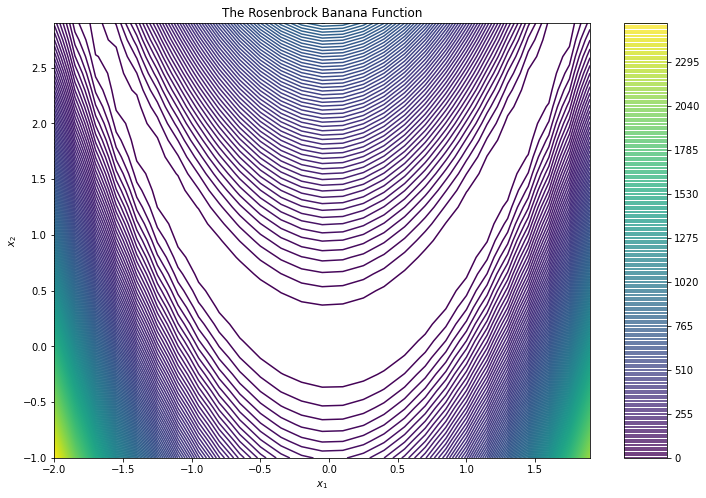

In [134]:
my_plot_contour(X, Y, "rosenbrock_banana")

### 5.3 The Log-Ellipsoid Function

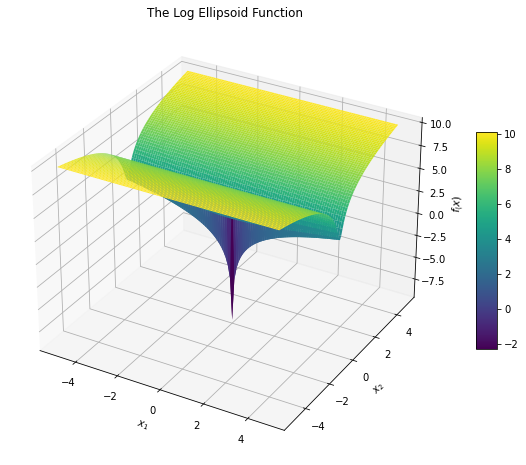

In [135]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
my_plot_3d(X, Y, "log_ellipsoid")

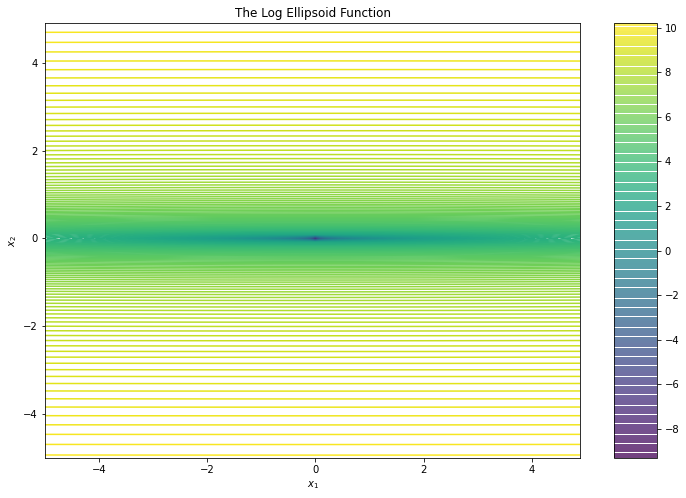

In [136]:
my_plot_contour(X, Y, "log_ellipsoid")

### 5.4 The Attractive-Sector Function

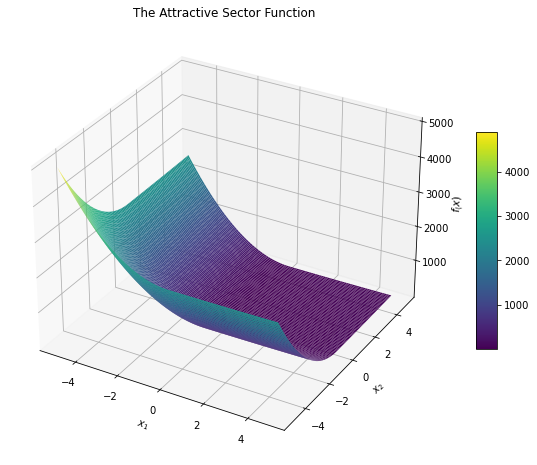

In [137]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
my_plot_3d(X, Y, "attractive_sector")

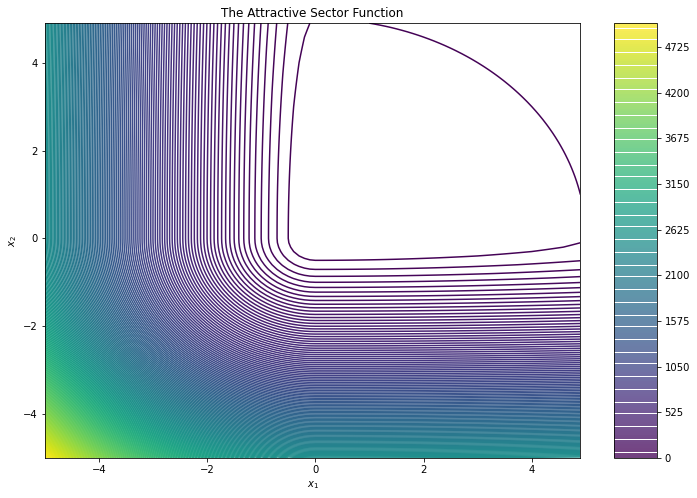

In [138]:
my_plot_contour(X, Y, "attractive_sector")

### 5.5 The Sum of Different Powers Function

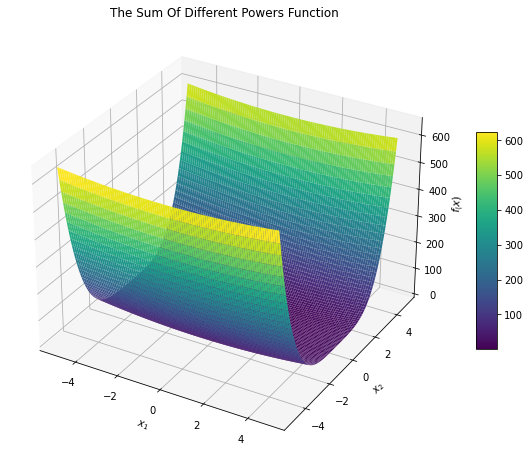

In [139]:
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
my_plot_3d(X, Y, "sum_of_different_powers")

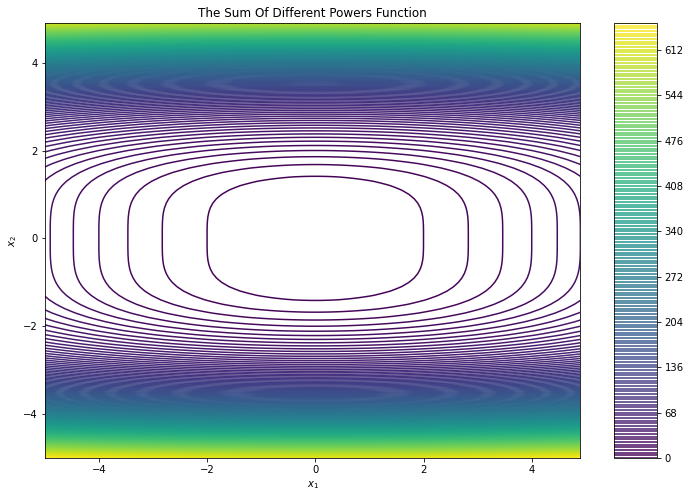

In [140]:
my_plot_contour(X, Y, "sum_of_different_powers")